In [1]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

!mkdir '/root/.kaggle'
!cp 'kaggle.json' '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets list -s credit

ref                                                        title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sakshigoyal7/credit-card-customers                         Credit Card customers                         387771  2020-11-19 07:38:44.677000         134330       2429  1.0              
mlg-ulb/creditcardfraud                                    Credit Card Fraud Detection                 69155672  2018-03-23 01:17:27.913000        1052656      12815  0.85294116       
rikdifos/credit-card-approval-prediction                   Credit Card Approval Prediction              5578875  2020-03-24 10:04:48.753000          96158        913  1.0              
parisrohan/credit-score-classification                     Credit score cla

In [4]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 524MB/s]


In [5]:
!unzip "credit-card-approval-prediction.zip" -d "credit-card-datasets"

Archive:  credit-card-approval-prediction.zip
  inflating: credit-card-datasets/application_record.csv  
  inflating: credit-card-datasets/credit_record.csv  


In [6]:
import pandas as pd

In [7]:
df_app = pd.read_csv("credit-card-datasets/application_record.csv")
df_rec = pd.read_csv("credit-card-datasets/credit_record.csv")

In [8]:
df_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [9]:
df_rec.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [10]:
df_app.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [11]:
df_rec["STATUS"].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [12]:
df_rec["Target"] = ~df_rec["STATUS"].isin(['X','C','0'])
print(df_rec["ID"].nunique(), df_rec["ID"].shape[0])
# Duplicate id is in ID columns

45985 1048575


In [13]:
df_rec_unique_id = df_rec.sort_values(["ID", "MONTHS_BALANCE"], ascending=False).drop_duplicates(subset=["ID"], keep="first")
print(df_rec_unique_id["ID"].nunique(), df_rec_unique_id["ID"].shape[0])

45985 45985


In [14]:
df_data = pd.merge(df_app, df_rec_unique_id, on="ID", how="inner").drop(columns=["MONTHS_BALANCE","STATUS", "ID"])

In [15]:
df_data.drop(columns=["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CODE_GENDER"], inplace=True)

In [16]:
df_data

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False
1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0,False
2,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,False
3,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False
4,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2.0,True
36453,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,False
36454,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2.0,False
36455,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2.0,True


In [17]:
df_data.shape[0]

36457

In [18]:
df_data["Target"].value_counts()

,count
Target,
False,36075
True,382


In [19]:
df_data["Target"] = df_data["Target"].apply(lambda x: 1 if x else 0)

/tmp/ipython-input-261820114.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_data.pivot_table(index='Income_Group',


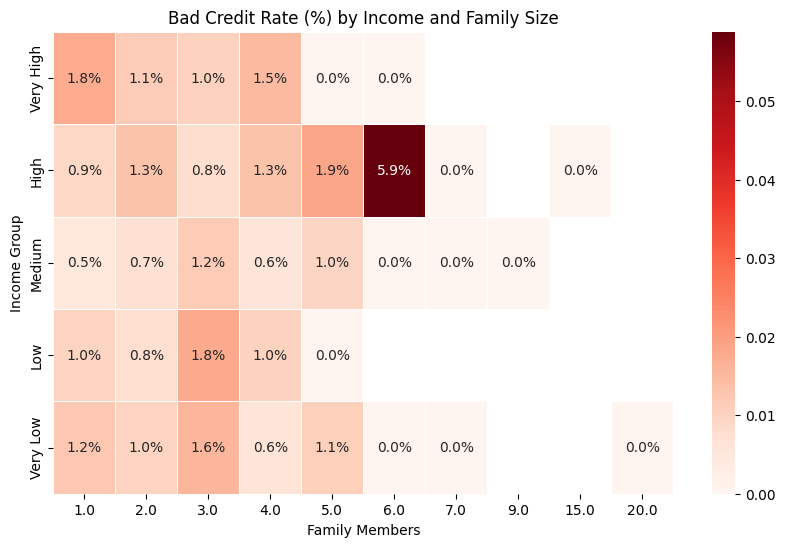

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. จัดกลุ่มรายได้ (Binning) ให้เป็นช่วงๆ (เช่น ต่ำ, ปานกลาง, สูง)
# ใช้ qcut เพื่อแบ่งช่วงตามจำนวนคนให้เท่าๆ กัน
df_data['Income_Group'] = pd.qcut(df_data['AMT_INCOME_TOTAL'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 2. สร้าง Pivot Table หาค่าเฉลี่ยของ Target (ซึ่งก็คือ % การเบี้ยวหนี้)
pivot_table = df_data.pivot_table(index='Income_Group',
                                  columns='CNT_FAM_MEMBERS',
                                  values='Target',
                                  aggfunc='mean')

# 3. พล็อต Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1%', cmap='Reds', linewidths=.5)

plt.title('Bad Credit Rate (%) by Income and Family Size')
plt.xlabel('Family Members')
plt.ylabel('Income Group')
# ปรับแกน Y ให้เรียงจาก Very Low ไป Very High (ถ้ามันสลับกัน)
plt.gca().invert_yaxis()
plt.show()

In [21]:
df_data[df_data["Target"] == 1]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,Income_Group
64,N,Y,2,126000.0,Commercial associate,Higher education,Married,House / apartment,-12411,-1773,Managers,4.0,1,Low
111,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,Laborers,1.0,1,Very High
241,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,Managers,3.0,1,Very High
400,N,N,0,193500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,-16099,-1866,Laborers,1.0,1,High
490,N,N,0,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19304,-464,Core staff,1.0,1,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36432,N,Y,0,306000.0,Pensioner,Higher education,Married,House / apartment,-21590,365243,NaN,2.0,1,Very High
36437,N,Y,0,135000.0,Working,Secondary / secondary special,Widow,House / apartment,-14394,-919,Managers,1.0,1,Low
36449,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-9847,-502,Core staff,3.0,1,Very High
36452,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2.0,1,Very High


In [22]:
df_data.isnull().sum()

,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0


In [23]:
y = df_data.pop("Target")
x = df_data

In [24]:
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import make_pipeline as make_pipeline_imb
RAND_STATE=123

In [25]:
class DaytoYearGenerate(BaseEstimator, TransformerMixin):
  def __init__(self):
    super().__init__()

  def fit(self, X, y=None):
    return self

  def transform(self, x):
    X = x.copy()
    if "DAYS_BIRTH" in x.columns:
      X["DAYS_BIRTH"] = (X["DAYS_BIRTH"] / -365).astype(int)
    if "DAYS_EMPLOYED" in x.columns:
      X["DAYS_EMPLOYED"] = round(X["DAYS_EMPLOYED"] / -365,2)
    return X


x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=RAND_STATE, test_size=0.3)

ordinal_features = ["NAME_EDUCATION_TYPE"]

nominal_features = x.select_dtypes(include='object').columns.tolist()

nominal_features.remove("NAME_EDUCATION_TYPE")



mapping_education = [

    'Lower secondary',

    'Secondary / secondary special',

    'Incomplete higher',

    'Higher education',

    'Academic degree'

]



numeric_enc = make_pipeline(
    DaytoYearGenerate(),

)

In [26]:


ordinal_enc = make_pipeline(

    OrdinalEncoder(categories=[mapping_education])

)



nominal_enc = make_pipeline(

    SimpleImputer(strategy="most_frequent"),

    OneHotEncoder()

)



preprocess = ColumnTransformer([

    ("num", numeric_enc, ["DAYS_BIRTH", "DAYS_EMPLOYED"]),

    ("ord", ordinal_enc, ordinal_features),

    ("nom", nominal_enc, nominal_features)

])



model_without_resample = make_pipeline(

    preprocess,

    RandomForestClassifier(random_state=RAND_STATE)

)

model_with_resample = make_pipeline_imb(

    preprocess,

    SMOTE(),

    RandomForestClassifier(random_state=RAND_STATE)

)


# Create Pipeline

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [28]:
# Start create Pipeline for ml model

class DaytoYearGenerate(BaseEstimator, TransformerMixin):
  def __init__(self):
    super().__init__()

  def fit(self, X, y=None):
    return self

  def transform(self, x):
    X = x.copy()
    if "DAYS_BIRTH" in x.columns:
      X["DAYS_BIRTH"] = (X["DAYS_BIRTH"] / -365).astype(int)
    if "DAYS_EMPLOYED" in x.columns:
      X["DAYS_EMPLOYED"] = round(X["DAYS_EMPLOYED"] / -365,2)
    return X

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=RAND_STATE, test_size=0.3)

In [30]:
ordinal_features = ["NAME_EDUCATION_TYPE"]
nominal_features = x.select_dtypes(include='object').columns.tolist()
nominal_features.remove("NAME_EDUCATION_TYPE")
numeric_features = x.select_dtypes(include='number').columns.tolist()

In [31]:
mapping_education = [
    'Lower secondary',
    'Secondary / secondary special',
    'Incomplete higher',
    'Higher education',
    'Academic degree'
]

In [32]:
numeric_enc = make_pipeline(
    DaytoYearGenerate(),
)
ordinal_enc = make_pipeline(
    OrdinalEncoder(categories=[mapping_education])
)

nominal_enc = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)

In [33]:
preprocess = ColumnTransformer([
    ("num", numeric_enc, numeric_features),
    ("ord", ordinal_enc, ordinal_features),
    ("nom", nominal_enc, nominal_features)
])

In [34]:
model_without_resample = make_pipeline(
    preprocess,
    RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=RAND_STATE)
)
model_with_resample = make_pipeline_imb(
    preprocess,
    SMOTE(),
    RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=RAND_STATE)
)

# Start train and validation phase

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [36]:
RAND_STATE=123

In [37]:
def run_model(model,x,y):
  f1_train_list, f1_val_list = [], []
  y_train_val_list, y_train_val_pred_list = [], []

  kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)
  for train_index, val_index in kf.split(x):
    x_train, x_val = x.iloc[train_index],x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    f1_train = f1_score(y_train, y_train_pred)
    f1_train_list.append(f1_train)

    y_train_proba = model.predict_proba(x_val)
    y_train_val_pred_list.append(y_train_proba[:,1])
    y_train_val_list.append(y_val)

    y_val_pred = model.predict(x_val)
    f1_val = f1_score(y_val, y_val_pred)
    f1_val_list.append(f1_val)

  return f1_train_list, f1_val_list, y_train_val_list, y_train_val_pred_list

In [38]:
f1_train, f1_val = {}, {}
y_train_val, y_train_pred = {}, {}

In [39]:
model1 = "rf_without_resample"
model2 = "rf_with_resample"

In [40]:
f1_train[model1], f1_val[model1], y_train_val[model1], y_train_pred[model1] = run_model(model_without_resample, x_train, y_train)
f1_train[model2], f1_val[model2], y_train_val[model2], y_train_pred[model2] = run_model(model_with_resample, x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instanc

In [41]:
import matplotlib.pyplot as plt

In [42]:
f1_val[model1]

[0.20994475138121546,
 0.12244897959183673,
 0.16574585635359115,
 0.09580838323353294,
 0.16393442622950818]

In [43]:
f1_val[model2]

[0.21978021978021978,
 0.17204301075268819,
 0.2,
 0.14084507042253522,
 0.10126582278481013]

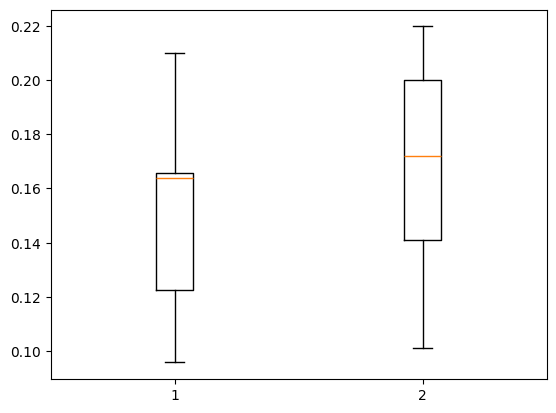

In [44]:
bp = plt.boxplot([f1_val[model1], f1_val[model2]])

In [60]:
f1_train[model2]

[0.5470588235294118, 0.5159420289855072, 0.53125, 0.5847665847665847, 0.56]

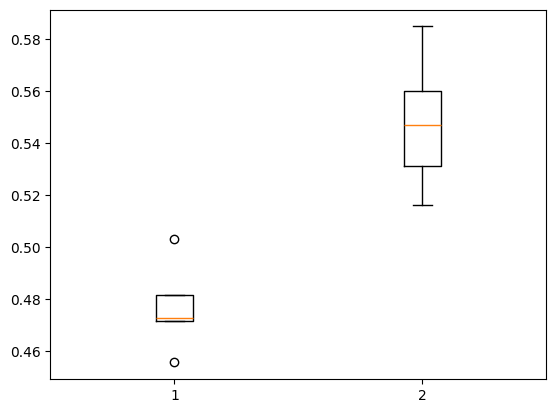

In [45]:
bp1 = plt.boxplot([f1_train[model1], f1_train[model2]])

In [46]:
import numpy as np
import seaborn as sns

In [47]:
def plot_confustion_matrix(model_name, norm=True):
  matrix = confusion_matrix(np.concatenate(y_train_val[model_name][:]), np.concatenate(y_train_pred[model_name]) > 0.5)
  fmt = 'd'
  if norm:
    matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
    fmt = '.4f'
  ax = sns.heatmap(matrix, annot=True, fmt=fmt, cmap='Blues')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')

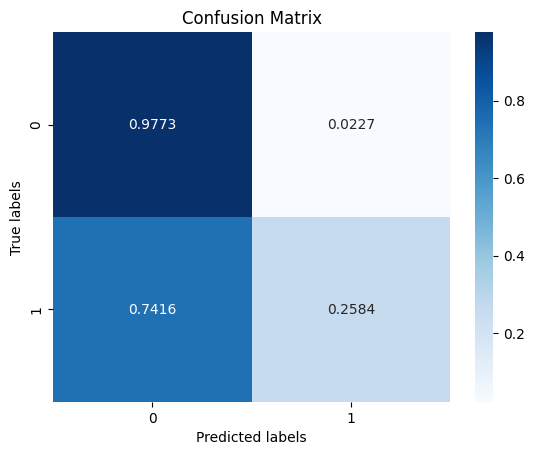

In [48]:
plot_confustion_matrix(model1)

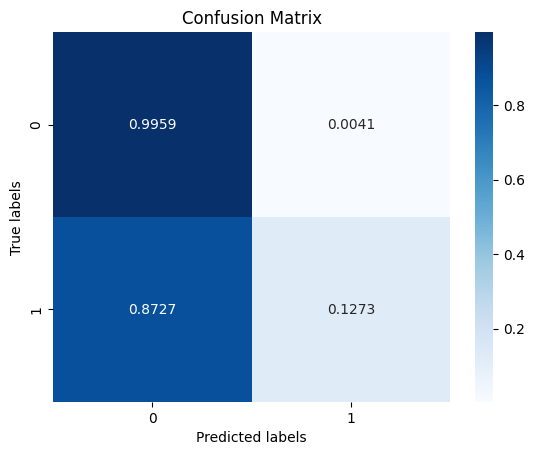

In [49]:
plot_confustion_matrix(model2)

In [50]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [51]:
np.concatenate(y_train_val[model1])

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_train_pred[model2]

[array([0.05154154, 0.0075    , 0.        , ..., 0.00083333, 0.001     ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , ..., 0.015     , 0.06648677,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.14212518, 0.        , ..., 0.00742857, 0.0025    ,
        0.        ])]

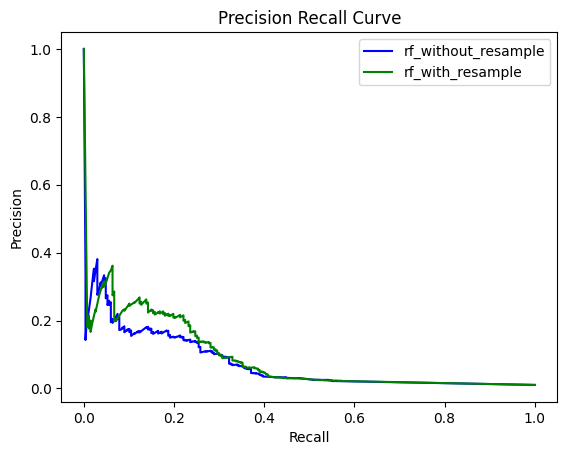

In [53]:
for model_name, color in zip([model1,model2],['b','g']):
  precision, recall, threshold = precision_recall_curve(np.concatenate(y_train_val[model_name]), np.concatenate(y_train_pred[model_name]))
  plt.plot(recall, precision, color=color,label=model_name)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision Recall Curve")
  plt.legend()

In [54]:
result = model_without_resample.predict_proba(x_test)
result

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


array([[0.995     , 0.005     ],
       [0.99543332, 0.00456668],
       [0.99507784, 0.00492216],
       ...,
       [0.995     , 0.005     ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Text(0.5, 1.0, 'Precision Recall Curve')

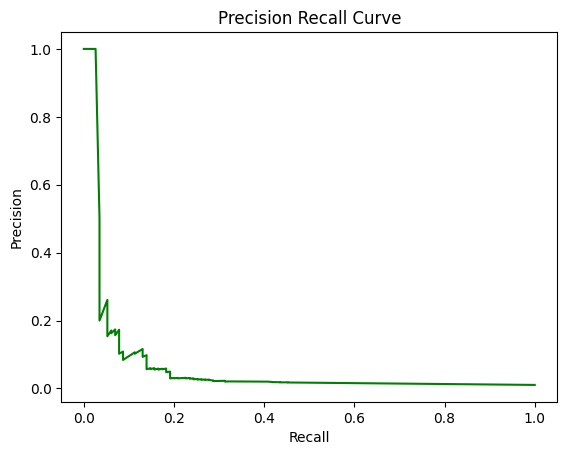

In [55]:
precision, recall, threshold = precision_recall_curve(y_test, result[:,1])
plt.plot(recall, precision, color=color)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

In [56]:
from sklearn.model_selection import cross_validate
results = model_with_resample.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [57]:
results

array([[0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [58]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, results[:,1])

In [59]:
auc

np.float64(0.6306400620257181)

In [64]:
md = model_with_resample[-1]
md.feature_importances_

array([4.78550286e-02, 6.54870624e-02, 5.00977566e-02, 4.11669480e-02,
       5.70685538e-02, 5.04330985e-02, 6.36113988e-02, 6.21530465e-02,
       6.58365617e-02, 7.71217271e-02, 4.26301740e-02, 1.16303740e-02,
       1.34864612e-02, 1.32820880e-05, 4.15220143e-02, 1.74016492e-02,
       7.11318200e-02, 5.62389463e-03, 2.91812708e-02, 4.97801406e-03,
       2.64402947e-05, 1.06334382e-02, 4.52150656e-03, 2.57483569e-04,
       2.26607872e-04, 4.81388494e-03, 2.56165867e-03, 2.05192611e-03,
       6.19108544e-03, 1.84569668e-02, 8.90569674e-03, 1.47571372e-03,
       5.50696200e-03, 3.21354598e-03, 6.74220442e-02, 2.19664739e-03,
       1.44272655e-02, 4.11683261e-03, 1.60897428e-04, 2.61081582e-04,
       1.82830115e-02, 1.95895171e-03, 2.88792879e-03, 1.01228598e-03])